In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
# Step 1: Load data
# Reading the CSV file into a pandas DataFrame

data = pd.read_csv("C:\\Users\\HP\\Downloads\\Placement Data.xls")

In [3]:
data.head()

,Unnamed: 0,grade,cgpa,iq,communication,technical_knowledge,placement
0,0,B,7.34,124,1,7,0
1,1,D,8.88,112,1,5,0
2,2,C,7.95,85,8,8,0
3,3,B,6.42,103,8,8,1
4,4,A,6.10,98,6,9,1


In [4]:
data = data.iloc[:,1:]

In [5]:
data

,grade,cgpa,iq,communication,technical_knowledge,placement
0,B,7.34,124,1,7,0
1,D,8.88,112,1,5,0
2,C,7.95,85,8,8,0
3,B,6.42,103,8,8,1
4,A,6.10,98,6,9,1
...,...,...,...,...,...,...
495,B,6.47,116,7,10,1
496,B,6.51,126,8,9,1
497,A,8.04,116,3,6,1
498,D,7.68,91,5,5,0


In [6]:
# Step 2: Preprocess data
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 grade                  0
cgpa                   0
iq                     0
communication          0
technical_knowledge    0
placement              0
dtype: int64


In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
# Encode categorical variable 'grade'
le = LabelEncoder()

data['grade'] = le.fit_transform(data['grade'])

In [9]:
data.head()

,grade,cgpa,iq,communication,technical_knowledge,placement
0,1,7.34,124,1,7,0
1,3,8.88,112,1,5,0
2,2,7.95,85,8,8,0
3,1,6.42,103,8,8,1
4,0,6.10,98,6,9,1


In [10]:
# Step 3: Perform exploratory data analysis (EDA)
# Display basic statistics
print("\nDataset Info:")
print(data.info())
print("\nBasic Statistics:")
print(data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   grade                500 non-null    int64  
 1   cgpa                 500 non-null    float64
 2   iq                   500 non-null    int64  
 3   communication        500 non-null    int64  
 4   technical_knowledge  500 non-null    int64  
 5   placement            500 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 23.6 KB
None

Basic Statistics:
            grade        cgpa          iq  communication  technical_knowledge  \
count  500.000000  500.000000  500.000000     500.000000           500.000000   
mean     1.110000    7.007540  109.786000       5.344000             5.626000   
std      0.967353    1.006612   17.363848       2.852707             2.810324   
min      0.000000    4.300000   80.000000       1.000000             1.000000   
2

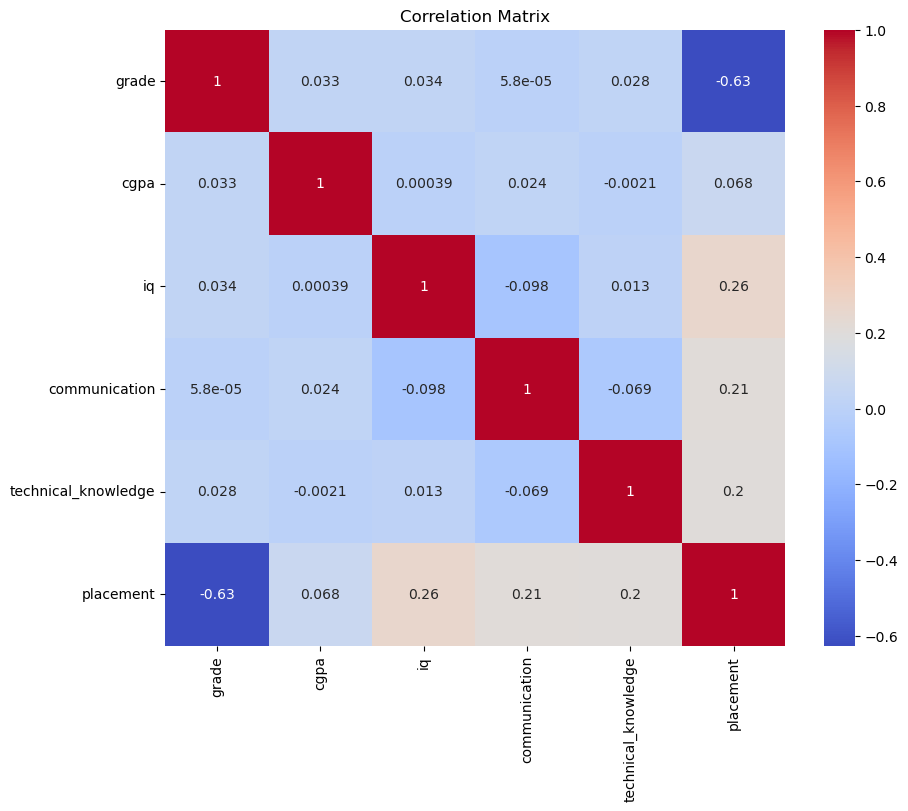

In [11]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Step 4: Transform data
# Define features (X) and target (y)
X = data.drop('placement', axis=1)
y = data['placement']

In [13]:
X.shape

(500, 5)

In [14]:
y.shape

(500,)

In [15]:
# Step 5: Split data into training and testing sets
# Using 80-20 split for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 5), (100, 5), (400,), (100,))

In [17]:
X_train

,grade,cgpa,iq,communication,technical_knowledge
249,2,5.35,130,1,9
433,0,8.07,81,7,7
19,0,7.62,115,1,3
322,1,4.92,85,2,1
332,0,6.64,97,10,6
...,...,...,...,...,...
106,1,7.08,131,3,7
270,2,7.01,81,3,9
348,1,8.03,108,8,8
435,2,8.41,116,5,9


In [18]:
X_test

,grade,cgpa,iq,communication,technical_knowledge
361,1,6.24,111,4,6
73,2,5.80,139,10,5
374,0,6.42,112,3,8
155,0,5.87,116,2,6
104,3,6.99,138,7,6
...,...,...,...,...,...
347,0,5.30,87,3,6
86,2,5.48,96,6,7
75,2,7.04,109,2,10
438,2,6.55,124,5,4


In [19]:
y_train

249    0
433    1
19     0
322    0
332    1
      ..
106    1
270    0
348    1
435    0
102    0
Name: placement, Length: 400, dtype: int64

In [20]:
y_test

361    0
73     1
374    1
155    1
104    0
      ..
347    0
86     0
75     0
438    0
15     1
Name: placement, Length: 100, dtype: int64

In [21]:
scaler = StandardScaler()

In [22]:
x_train_scl = scaler.fit_transform(X_train)

In [23]:
x_test_scl = scaler.transform(X_test)

In [24]:
x_train_scl

array([[ 0.91303697, -1.64276431,  1.18743074, -1.51953767,  1.19880545],
       [-1.14451114,  1.07436486, -1.66683005,  0.57397003,  0.48997739],
       [-1.14451114,  0.62483981,  0.31367744, -1.51953767, -0.92767872],
       ...,
       [-0.11573708,  1.03440708, -0.09407411,  0.92288798,  0.84439142],
       [ 0.91303697,  1.41400601,  0.37192766, -0.12386587,  1.19880545],
       [-0.11573708,  1.69371048, -1.08432785, -1.51953767,  0.84439142]])

In [25]:
x_test_scl

array([[-0.11573708, -0.75370366,  0.08067656, -0.47278382,  0.13556337],
       [ 0.91303697, -1.19323926,  1.71168272,  1.62072388, -0.21885066],
       [-1.14451114, -0.57389364,  0.13892678, -0.82170177,  0.84439142],
       [-1.14451114, -1.12331314,  0.37192766, -1.17061972,  0.13556337],
       [ 1.94181103, -0.00449525,  1.6534325 ,  0.57397003,  0.13556337],
       [-0.11573708,  0.18530421,  1.18743074, -0.82170177,  1.19880545],
       [-1.14451114, -0.09440026,  1.0709303 ,  1.27180593, -1.63650677],
       [-1.14451114,  0.27520922,  0.197177  ,  0.22505208,  1.55321948],
       [-1.14451114, -0.52394642, -1.20082829, -1.51953767, -0.57326469],
       [ 0.91303697,  1.55385824,  0.4884281 , -0.12386587, -0.92767872],
       [ 0.91303697, -0.46400974,  1.6534325 , -0.12386587, -0.92767872],
       [-0.11573708,  0.34513534, -1.37557895,  1.62072388, -0.57326469],
       [-0.11573708,  0.27520922, -1.43382917, -0.12386587, -1.28209275],
       [-0.11573708, -0.27421028, -1.5

In [26]:
nb_model = GaussianNB()

In [27]:
nb_model.fit(x_train_scl,y_train)

GaussianNB()

In [28]:
# Step 7: Evaluate model
# Make predictions on test set
y_pred = nb_model.predict(x_test_scl)

In [29]:
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1])

In [30]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

In [31]:
accuracy

0.83

In [32]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        51
           1       0.78      0.92      0.84        49

    accuracy                           0.83       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.84      0.83      0.83       100



In [33]:
nb_model.score(x_test_scl,y_test)

0.83

In [34]:
pd.DataFrame({"y_true": y_test, "y_pred": y_pred})

,y_true,y_pred
361,0,1
73,1,0
374,1,1
155,1,1
104,0,0
...,...,...
347,0,1
86,0,0
75,0,0
438,0,0


In [35]:
# Step 8: Tune hyperparameters
# Define parameter grid for GaussianNB (var_smoothing is the main parameter to tune)
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=10)
}

In [36]:
param_grid

{'var_smoothing': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
        1.e-08, 1.e-09])}

In [37]:
# Perform grid search
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train_scl, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])},
             scoring='accuracy')

In [38]:
# Get best model
best_model = grid_search.best_estimator_

print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)


Best Parameters: {'var_smoothing': np.float64(1.0)}
Best Cross-validation Score: 0.8549999999999999


In [39]:
# Step 9: Evaluate tuned model
# Make predictions with tuned model
y_pred_tuned = best_model.predict(x_test_scl)

In [40]:
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)

In [41]:
tuned_accuracy

0.83

In [42]:
best_model.score(x_test_scl, y_test)

0.83

In [43]:
joblib.dump(best_model, 'naive_bayes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

In [44]:
unseen_data = pd.DataFrame({
    'grade': ['A'],
    'cgpa': [7.5],
    'iq': [100],
    'communication': [8],
    'technical_knowledge': [7]
})

In [45]:
unseen_data

,grade,cgpa,iq,communication,technical_knowledge
0,A,7.5,100,8,7


In [46]:
# Preprocess unseen data
unseen_data['grade'] = le.transform(unseen_data['grade'])
unseen_data_scaled = scaler.transform(unseen_data)

In [47]:
unseen_data_scaled

array([[-1.14451114,  0.50496647, -0.56007587,  0.92288798,  0.48997739]])

In [48]:
# Make prediction on unseen data
prediction = best_model.predict(unseen_data_scaled)
prediction
("\nPrediction for unseen data:", "Placed" if prediction[0] == 1 else "Not Placed")

('\nPrediction for unseen data:', 'Placed')

In [49]:
joblib.load('naive_bayes_model.pkl')

GaussianNB(var_smoothing=np.float64(1.0))